## Custom Environments

In [5]:

class CustomEnv(MComCore):
    # overwrite the default config
    @classmethod
    def default_config(cls):
        config = super().default_config()
        config.update({
            # 10 steps per episode
            "EP_MAX_TIME": 10,
            # identical episodes
            "seed": 1234,
            'reset_rng_episode': True,
        })
        # faster user movement
        config["ue"].update({
            "velocity": 10,
        })
        return config

    # configure users and cells in the constructor
    def __init__(self, config={}, render_mode=None):
        # load default config defined above; overwrite with custom params
        env_config = self.default_config()
        env_config.update(config)

        # 7-8 cells next to each other; unpack config defaults for other params
        stations = [
            BaseStation(bs_id=0, pos=(75, 50), **env_config["bs"]),
            BaseStation(bs_id=1, pos=(125, 50), **env_config["bs"]),
            BaseStation(bs_id=2, pos=(50, 100), **env_config["bs"]),
            BaseStation(bs_id=3, pos=(100, 100), **env_config["bs"]),
            BaseStation(bs_id=4, pos=(150, 100), **env_config["bs"]),
            BaseStation(bs_id=5, pos=(75, 150), **env_config["bs"]),
            BaseStation(bs_id=6, pos=(125, 150), **env_config["bs"]),
        ]

        # users
        users = [
            # two fast moving users with config defaults
            UserEquipment(ue_id=1, **env_config["ue"]),
            UserEquipment(ue_id=2, **env_config["ue"]),
            # stationary user --> set velocity to 0
            UserEquipment(ue_id=3, velocity=0, snr_tr=env_config["ue"]["snr_tr"], noise=env_config["ue"]["noise"],
                          height=env_config["ue"]["height"]),
        ]

        super().__init__(stations, users, config, render_mode)


# init and render the custom scenario
env = CustomEnv(render_mode="rgb_array")
env.reset()
for _ in range(10):
    # here, use random dummy actions by sampling from the action space
    dummy_action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(dummy_action)

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)                     

NameError: name 'MComCore' is not defined

## Gymnasium environment

In [7]:
import gymnasium
import matplotlib.pyplot as plt
# importing mobile_env automatically registers the predefined scenarios in Gym
import mobile_env

In [8]:
# predefined small scenarios
from mobile_env.scenarios.smart_city import MComSmartCity

# easy access to the default configuration
MComSmartCity.default_config()

{'width': 200,
 'height': 200,
 'EP_MAX_TIME': 100,
 'seed': 0,
 'reset_rng_episode': False,
 'arrival': mobile_env.core.arrival.NoDeparture,
 'channel': mobile_env.core.channels.OkumuraHata,
 'scheduler': mobile_env.core.schedules.ResourceFair,
 'movement': mobile_env.core.movement.RandomWaypointMovement,
 'utility': mobile_env.core.utilities.BoundedLogUtility,
 'handler': mobile_env.handlers.central.MComCentralHandler,
 'bs': {'bw': 9000000.0, 'freq': 2500, 'tx': 30, 'height': 50},
 'ue': {'velocity': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09, 'height': 1.5},
 'sensor': {'height': 1.5, 'range': 100, 'velocity': 0},
 'arrival_params': {'ep_time': 100, 'reset_rng_episode': False},
 'channel_params': {},
 'scheduler_params': {},
 'movement_params': {'width': 200, 'height': 200, 'reset_rng_episode': False},
 'utility_params': {'lower': -20, 'upper': 20, 'coeffs': (10, 0, 10)},
 'metrics': {'scalar_metrics': {}, 'ue_metrics': {}, 'bs_metrics': {}}}

In [9]:
print(gymnasium.pprint_registry())

===== classic_control =====
Acrobot-v1                CartPole-v0               CartPole-v1
MountainCar-v0            MountainCarContinuous-v0  Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0        phys2d/CartPole-v1        phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3          BipedalWalkerHardcore-v3  CarRacing-v2
LunarLander-v2            LunarLanderContinuous-v2
===== toy_text =====
Blackjack-v1              CliffWalking-v0           FrozenLake-v1
FrozenLake8x8-v1          Taxi-v3
===== tabular =====
tabular/Blackjack-v0      tabular/CliffWalking-v0
===== mujoco =====
Ant-v2                    Ant-v3                    Ant-v4
HalfCheetah-v2            HalfCheetah-v3            HalfCheetah-v4
Hopper-v2                 Hopper-v3                 Hopper-v4
Humanoid-v2               Humanoid-v3               Humanoid-v4
HumanoidStandup-v2        HumanoidStandup-v4        InvertedDoublePendulum-v2
InvertedDoublePendulum-v4 InvertedPendulum-v2       InvertedPendulum-v4
Pusher-v

In [10]:
print(gymnasium.envs.registration.current_namespace)
print(gymnasium.envs.registration.parse_env_id("mobile-smart_city-central-v0"))
print(gymnasium.spec("mobile-small-central-v0"))
print(gymnasium.spec('mobile-smart_city-central-v0'))

None
(None, 'mobile-smart_city-central', 0)
EnvSpec(id='mobile-small-central-v0', entry_point='mobile_env.scenarios.small:MComSmall', reward_threshold=None, nondeterministic=False, max_episode_steps=None, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'config': {'handler': <class 'mobile_env.handlers.central.MComCentralHandler'>}}, namespace=None, name='mobile-small-central', version=0, additional_wrappers=(), vector_entry_point=None)
EnvSpec(id='mobile-smart_city-central-v0', entry_point='mobile_env.scenarios.smart_city:MComSmartCity', reward_threshold=None, nondeterministic=False, max_episode_steps=None, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'config': {'handler': <class 'mobile_env.handlers.central.MComCentralHandler'>}}, namespace=None, name='mobile-smart_city-central', version=0, additional_wrappers=(), vector_entry_point=None)


'smart_city-central-v0' is a customized scenario, registered as a Gymnasium environment, that can be used for RL experimentation.

In [11]:
# create a small mobile environment for a single, centralized control agent
# pass rgb_array as render mode so the env can be rendered inside the notebook
env = gymnasium.make("mobile-smart_city-central-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users and {env.NUM_STATIONS} cells.")


Smart city environment with 10 users and 6 cells.


c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_USERS to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.NUM_USERS` for environment variables or `env.get_wrapper_attr('NUM_USERS')` that will search the reminding wrappers.
  logger.warn(
c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_STATIONS to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.NUM_STATIONS` for environment variables or `env.get_wrapper_attr('NUM_STATIONS')` that will search the reminding wrappers.
  logger.warn(


Here, we consider a smart city scenario (called `"mobile-smart_city-central-v0"`) with 15 users and 7 cells.
As the users move around, the goal is to connect the users to suitable cells, ensuring that all users have a good Quality of Experience (QoE).

Using coordinated multipoint (CoMP), users can connect to multiple cells simultaneously.
Connecting to more cells increases the user's data rate but also increases competition for resources and may decrease data rates of other users.
Therefore, a good coordination policy needs to balance this trade-off, depending on available resources and users' positions (affecting their path loss).

To measure QoE, `mobile-env` defaults to a logarithmic utility function of the users' data rate, where -20 indicates bad QoE and +20 indicates good QoE. This can be easily configured and changed.

## Customized gymnasium environment: `smart-city`

In [1]:
import gymnasium
import matplotlib.pyplot as plt
# importing mobile_env automatically registers the predefined scenarios in Gym
import mobile_env

In [2]:
# predefined small scenarios
from mobile_env.scenarios.smart_city import MComSmartCity

# easy access to the default configuration
MComSmartCity.default_config()

{'width': 200,
 'height': 200,
 'EP_MAX_TIME': 100,
 'seed': 0,
 'reset_rng_episode': False,
 'arrival': mobile_env.core.arrival.NoDeparture,
 'channel': mobile_env.core.channels.OkumuraHata,
 'scheduler': mobile_env.core.schedules.ResourceFair,
 'movement': mobile_env.core.movement.RandomWaypointMovement,
 'utility': mobile_env.core.utilities.BoundedLogUtility,
 'handler': mobile_env.handlers.central.MComCentralHandler,
 'bs': {'bw': 9000000.0, 'freq': 2500, 'tx': 30, 'height': 50},
 'ue': {'velocity': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09, 'height': 1.5},
 'sensor': {'height': 1.5, 'range': 100, 'velocity': 0},
 'arrival_params': {'ep_time': 100, 'reset_rng_episode': False},
 'channel_params': {},
 'scheduler_params': {},
 'movement_params': {'width': 200, 'height': 200, 'reset_rng_episode': False},
 'utility_params': {'lower': -20, 'upper': 20, 'coeffs': (10, 0, 10)},
 'metrics': {'scalar_metrics': {}, 'ue_metrics': {}, 'bs_metrics': {}}}

In [3]:
# create a small mobile environment for a single, centralized control agent
# pass rgb_array as render mode so the env can be rendered inside the notebook
env = gymnasium.make("mobile-smart_city-central-v0", render_mode="rgb_array")

print(f"\nSmart city environment with {env.NUM_USERS} users, {env.NUM_SENSORS} sensors and {env.NUM_STATIONS} cells.")


Smart city environment with 10 users, 25 sensors and 6 cells.


c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_USERS to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.NUM_USERS` for environment variables or `env.get_wrapper_attr('NUM_USERS')` that will search the reminding wrappers.
  logger.warn(
c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_SENSORS to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.NUM_SENSORS` for environment variables or `env.get_wrapper_attr('NUM_SENSORS')` that will search the reminding wrappers.
  logger.warn(
c:\Users\elifo\AppData\Local\Programs\Python\Python39\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.NUM_STATIONS to get variables from other wrappers is deprecated and will be removed in v1.0, to get th

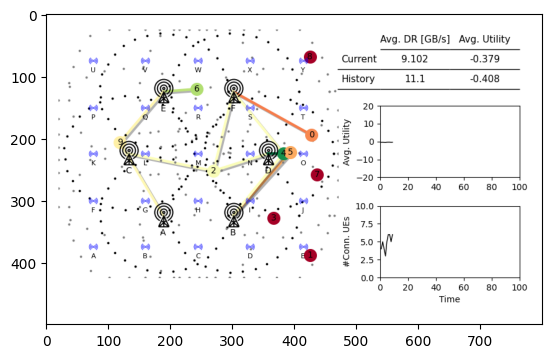

In [4]:
from IPython import display

# run the simulation for 10 time steps
done = False
obs, info = env.reset()
for _ in range(10):
    # here, use random dummy actions by sampling from the action space
    dummy_action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(dummy_action)

    # render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

The rendered environment shows the 6 cells as cell towers with circles indicating their range.
The 15 moving users are shown as small circles, where the number indicates the user ID and
the color represents the user's current QoE (red = bad, yellow = ok, green = good).

A line between a user and a cell indicates that the user is connected to the cell.
Again, the line color indicates the QoE that's achieved via the connection.
Note that users can connect to multiple cells simultaneously using coordinated multipoint (CoMP).

Here, with random action, users sometimes connect to cells but are oftentimes also completely disconnected from any cells, leading to bad QoE (red circles).

In [5]:
MComSmartCity.default_config()

{'width': 200,
 'height': 200,
 'EP_MAX_TIME': 100,
 'seed': 0,
 'reset_rng_episode': False,
 'arrival': mobile_env.core.arrival.NoDeparture,
 'channel': mobile_env.core.channels.OkumuraHata,
 'scheduler': mobile_env.core.schedules.ResourceFair,
 'movement': mobile_env.core.movement.RandomWaypointMovement,
 'utility': mobile_env.core.utilities.BoundedLogUtility,
 'handler': mobile_env.handlers.central.MComCentralHandler,
 'bs': {'bw': 9000000.0, 'freq': 2500, 'tx': 30, 'height': 50},
 'ue': {'velocity': 1.5, 'snr_tr': 2e-08, 'noise': 1e-09, 'height': 1.5},
 'sensor': {'height': 1.5, 'range': 100, 'velocity': 0},
 'arrival_params': {'ep_time': 100, 'reset_rng_episode': False},
 'channel_params': {},
 'scheduler_params': {},
 'movement_params': {'width': 200, 'height': 200, 'reset_rng_episode': False},
 'utility_params': {'lower': -20, 'upper': 20, 'coeffs': (10, 0, 10)},
 'metrics': {'scalar_metrics': {}, 'ue_metrics': {}, 'bs_metrics': {}}}